In [1]:
hd_data <- read.csv("Cleveland_hd.csv")
head(hd_data, n=5)
library(tidyverse)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──



✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1



── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# Use the 'mutate' function from dplyr to recode our data
hd_data %>% mutate(hd = ifelse(class > 0, 1, 0))-> hd_data

In [3]:
# recode sex using mutate function and save as hd_data
hd_data %>% mutate(sex = factor(sex, levels = 0:1, labels = c("Female","Male")))-> hd_data

In [4]:
# Does sex have an effect? Sex is a binary variable in this dataset,
# so the appropriate test is chi-squared test
hd_sex <- chisq.test(hd_data$sex,hd_data$hd)

In [5]:
# Does age have an effect? Age is continuous, so we use a t-test
hd_age <- t.test(hd_data$age ~ hd_data$hd)

In [6]:
# What about thalach? Thalach is continuous, so we use a t-test
hd_heartrate <- t.test(hd_data$thalach ~ hd_data$hd)

In [7]:
print(hd_sex)
print(hd_age)
print(hd_heartrate)


	Pearson's Chi-squared test with Yates' continuity correction

data:  hd_data$sex and hd_data$hd
X-squared = 22.043, df = 1, p-value = 2.667e-06




	Welch Two Sample t-test

data:  hd_data$age by hd_data$hd
t = -4.0303, df = 300.93, p-value = 7.061e-05
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -6.013385 -2.067682
sample estimates:
mean in group 0 mean in group 1 
       52.58537        56.62590 




	Welch Two Sample t-test

data:  hd_data$thalach by hd_data$hd
t = 7.8579, df = 272.27, p-value = 9.106e-14
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 14.32900 23.90912
sample estimates:
mean in group 0 mean in group 1 
        158.378         139.259 



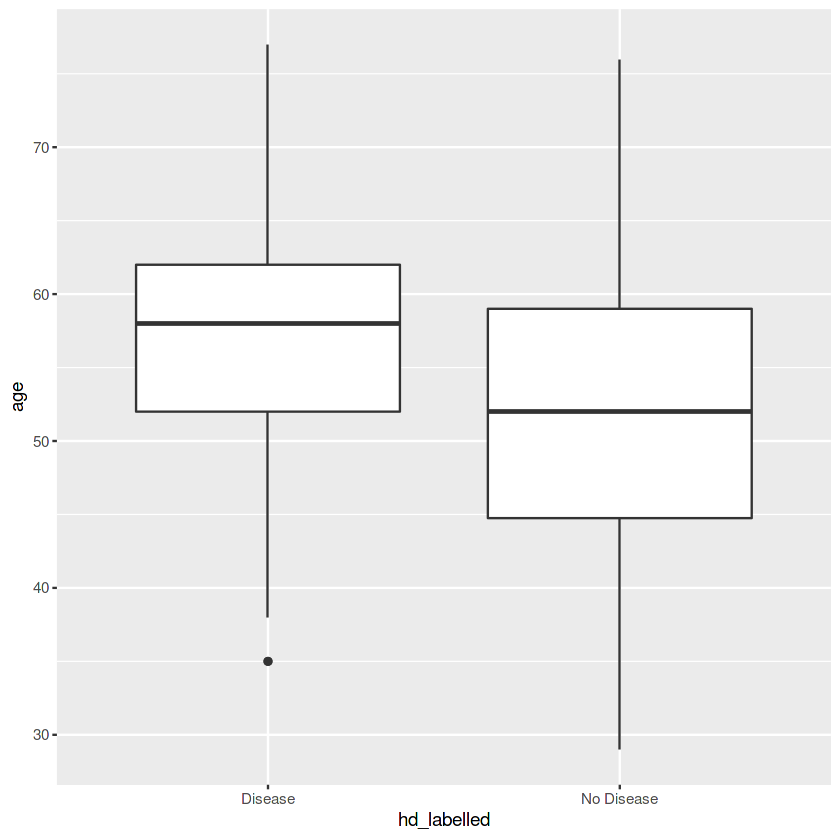

In [8]:
# Recode hd to be labelled
hd_data %>% mutate(hd_labelled = ifelse(hd == 1, "Disease", "No Disease")) -> hd_data

# age vs hd
ggplot(data = hd_data, aes(x = hd_labelled,y = age)) + geom_boxplot()

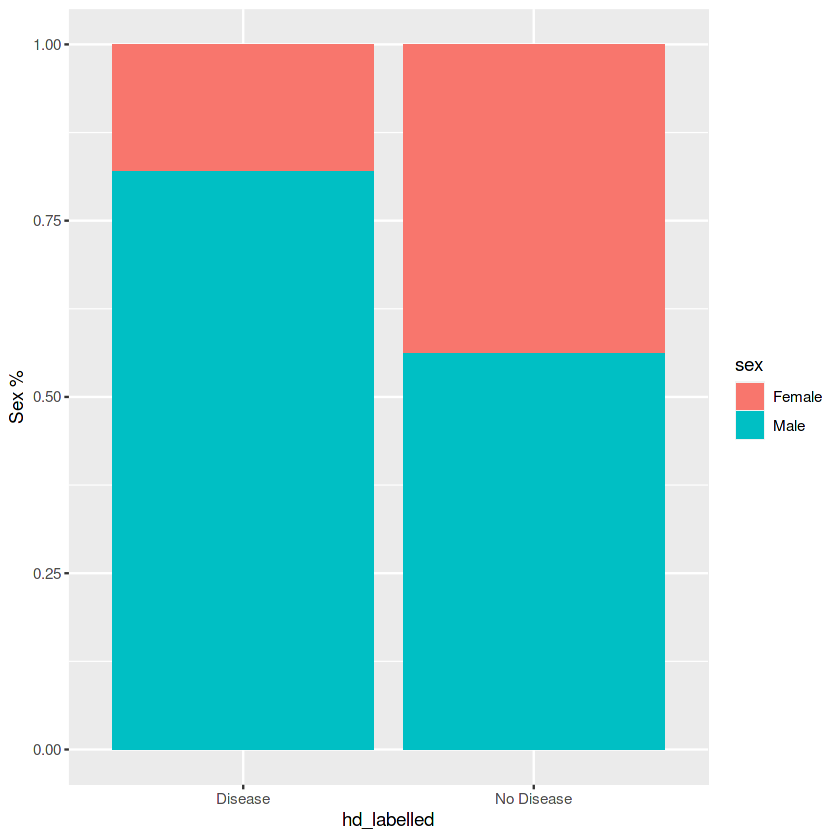

In [9]:
# sex vs hd
ggplot(data = hd_data,aes(hd_labelled, fill=sex)) + geom_bar(position="fill") + ylab("Sex %")

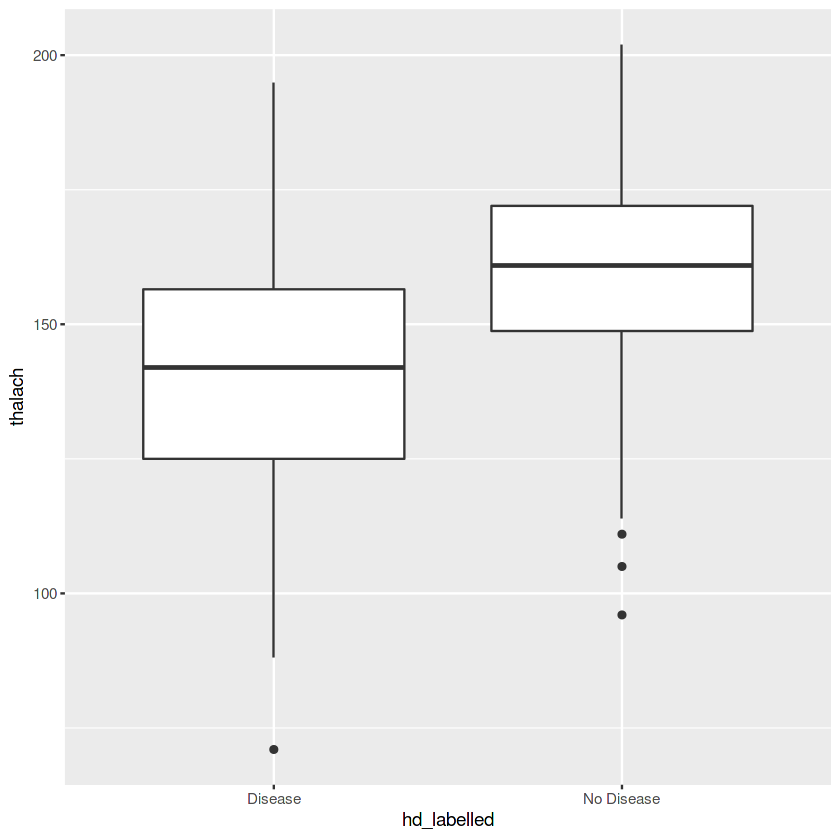

In [10]:
# max heart rate vs hd
ggplot(data = hd_data,aes(hd_labelled,thalach)) + geom_boxplot()

In [11]:
# use glm function from base R and specify the family argument as binomial
model <- glm(data = hd_data, hd~age+sex+thalach, family="binomial")

# extract the model summary
summary(model)


Call:
glm(formula = hd ~ age + sex + thalach, family = "binomial", 
    data = hd_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2250  -0.8486  -0.4570   0.9043   2.1156  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.111610   1.607466   1.936   0.0529 .  
age          0.031886   0.016440   1.940   0.0524 .  
sexMale      1.491902   0.307193   4.857 1.19e-06 ***
thalach     -0.040541   0.007073  -5.732 9.93e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.98  on 302  degrees of freedom
Residual deviance: 332.85  on 299  degrees of freedom
AIC: 340.85

Number of Fisher Scoring iterations: 4


In [12]:
# load the broom package
library(broom)

# tidy up the coefficient table
tidy_m <- model %>% tidy()
tidy_m

# calculate OR
tidy_m$OR <- exp(tidy_m$estimate)

# calculate 95% CI and save as lower CI and upper CI
tidy_m$lower_CI <- exp(tidy_m$estimate - 1.96 * tidy_m$std.error)
tidy_m$upper_CI <- exp(tidy_m$estimate + 1.96 * tidy_m$std.error)

# display the updated coefficient table
tidy_m

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.11161046,1.607466382,1.935724,5.290157e-02
age,0.03188572,0.016439824,1.939541,5.243548e-02
sexMale,1.49190218,0.307192627,4.856569,1.194372e-06
thalach,-0.04054143,0.007072952,-5.731897,9.931367e-09


term,estimate,std.error,statistic,p.value,OR,lower_CI,upper_CI
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.11161046,1.607466382,1.935724,5.290157e-02,22.4571817,0.9617280,524.3946593
age,0.03188572,0.016439824,1.939541,5.243548e-02,1.0323995,0.9996637,1.0662073
sexMale,1.49190218,0.307192627,4.856569,1.194372e-06,4.4455437,2.4346539,8.1173174
thalach,-0.04054143,0.007072952,-5.731897,9.931367e-09,0.9602694,0.9470490,0.9736743


In [13]:
# get the predicted probability in our dataset using the predict() function
pred_prob <- predict(model, hd_data, type = "response")

# create a decision rule using probability 0.5 as cutoff and save the predicted decision into the main data frame
hd_data$pred_hd <- ifelse(pred_prob>=.5,1,0)

# create a newdata data frame to save a new case information
newdata <- data.frame(age = 45, sex = "Female", thalach = 150)

# predict probability for this new case and print out the predicted value
p_new <- predict(model, newdata, type = "response")
p_new


1 
0.1773002

In [14]:
# load Metrics package
library(Metrics)

# calculate auc, accuracy, clasification error
auc <- auc(hd_data$hd, hd_data$pred_hd)
accuracy <- accuracy(hd_data$hd, hd_data$pred_hd)
classification_error <- ce(hd_data$hd, hd_data$pred_hd)

# print out the metrics on to screen
print(paste("AUC=", auc))
print(paste("Accuracy=", accuracy))
print(paste("Classification Error=", classification_error))

# confusion matrix
table(hd_data$hd, hd_data$pred_hd, dnn=c("True Status","Predicted Status")) # confusion matrix

[1] "AUC= 0.706483593612915"


[1] "Accuracy= 0.70957095709571"


[1] "Classification Error= 0.29042904290429"


           Predicted Status
True Status   0   1
          0 122  42
          1  46  93

In [15]:
#Modifying the data for Decision Tree model
hd_data = subset(hd_data, select = -c(cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,class,hd_labelled,pred_hd) )
print(hd_data)

    age    sex thalach hd
1    63   Male     150  0
2    67   Male     108  1
3    67   Male     129  1
4    37   Male     187  0
5    41 Female     172  0
6    56   Male     178  0
7    62 Female     160  1
8    57 Female     163  0
9    63   Male     147  1
10   53   Male     155  1
11   57   Male     148  0
12   56 Female     153  0
13   56   Male     142  1
14   44   Male     173  0
15   52   Male     162  0
16   57   Male     174  0
17   48   Male     168  1
18   54   Male     160  0
19   48 Female     139  0
20   49   Male     171  0
21   64   Male     144  0
22   58 Female     162  0
23   58   Male     160  1
24   58   Male     173  1
25   60   Male     132  1
26   50 Female     158  0
27   58 Female     172  0
28   66 Female     114  0
29   43   Male     171  0
30   40   Male     114  1
31   69 Female     151  0
32   60   Male     160  1
33   64   Male     158  1
34   59   Male     161  0
35   44   Male     179  0
36   42   Male     178  0
37   43   Male     120  1
38   57   Ma

In [16]:
library(rpart)
#Using Decision Tree model
fit <- rpart(hd ~ sex + 
             thalach+age, 
             method = "anova", data = hd_data)
png(file = "decTreeGFG.png", width = 600, 
                            height = 600)
  
# Plot
plot(fit, uniform = TRUE,
          main = "Heart Rate Decision 
                 Tree using Regression")
text(fit, use.n = TRUE, cex = .7)
  
# Saving the file
dev.off()
# Print model
print(fit)


png 
  2

n= 303 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 303 75.234320 0.45874590  
   2) thalach>=147.5 176 35.795450 0.28409090  
     4) age< 57.5 121 18.000000 0.18181820  
       8) sex=Female 39  1.897436 0.05128205 *
       9) sex=Male 82 15.121950 0.24390240  
        18) thalach>=168.5 43  4.418605 0.11627910 *
        19) thalach< 168.5 39  9.230769 0.38461540 *
     5) age>=57.5 55 13.745450 0.50909090  
      10) sex=Female 26  5.884615 0.34615380  
        20) age>=63.5 10  0.900000 0.10000000 *
        21) age< 63.5 16  4.000000 0.50000000 *
      11) sex=Male 29  6.551724 0.65517240  
        22) thalach< 157.5 10  2.400000 0.40000000 *
        23) thalach>=157.5 19  3.157895 0.78947370 *
   3) thalach< 147.5 127 26.629920 0.70078740  
     6) sex=Female 32  7.875000 0.43750000  
      12) age>=65.5 7  0.000000 0.00000000 *
      13) age< 65.5 25  6.160000 0.56000000  
        26) age< 54 8  1.500000 0.25000000 *
        27) age>=54 17  3.529412 0

In [17]:
# Create test data
df <- data.frame (age = 26,sex = "Female",thalach = 140)

# Predicting hd class variable
# using testing data and model
# method anova is used for regression
cat("Predicted value:\n")
x=predict(fit, df, method = "anova")
round(x)


Predicted value:


1 
0

In [18]:
#Since predicted value is 0 which means that the person for which test data is entered will not have a disease

In [19]:
#Revisiting data for SVR Model
#Creating 2 new dataframes for age and sex plot of SVR model
hd_age<-hd_data
hd_sex<-hd_data

hd_data = subset(hd_data, select = -c(age,sex) )

print(hd_data)


    thalach hd
1       150  0
2       108  1
3       129  1
4       187  0
5       172  0
6       178  0
7       160  1
8       163  0
9       147  1
10      155  1
11      148  0
12      153  0
13      142  1
14      173  0
15      162  0
16      174  0
17      168  1
18      160  0
19      139  0
20      171  0
21      144  0
22      162  0
23      160  1
24      173  1
25      132  1
26      158  0
27      172  0
28      114  0
29      171  0
30      114  1
31      151  0
32      160  1
33      158  1
34      161  0
35      179  0
36      178  0
37      120  1
38      112  1
39      132  1
40      137  0
41      114  1
42      178  0
43      162  0
44      157  0
45      169  1
46      165  1
47      123  0
48      128  1
49      157  0
50      152  0
51      168  0
52      140  0
53      153  1
54      188  0
55      144  1
56      109  1
57      163  1
58      158  1
59      152  0
60      125  0
61      142  1
62      160  0
63      131  1
64      170  0
65      113  1
66      14

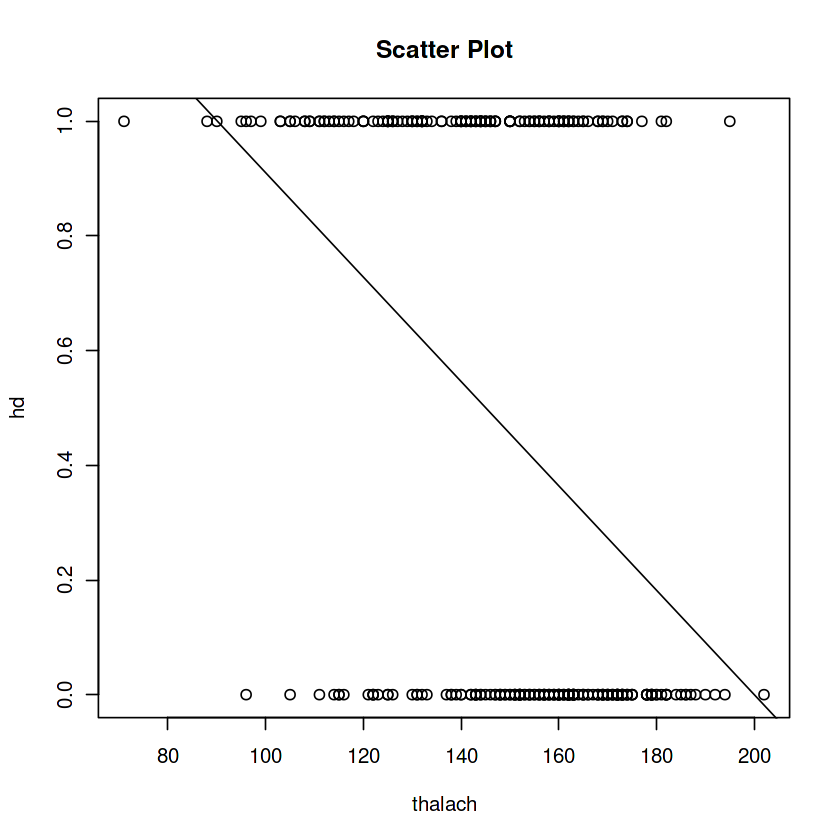

In [20]:

plot(hd_data, main ="Scatter Plot")

model=lm(hd~thalach,hd_data)
abline(model)




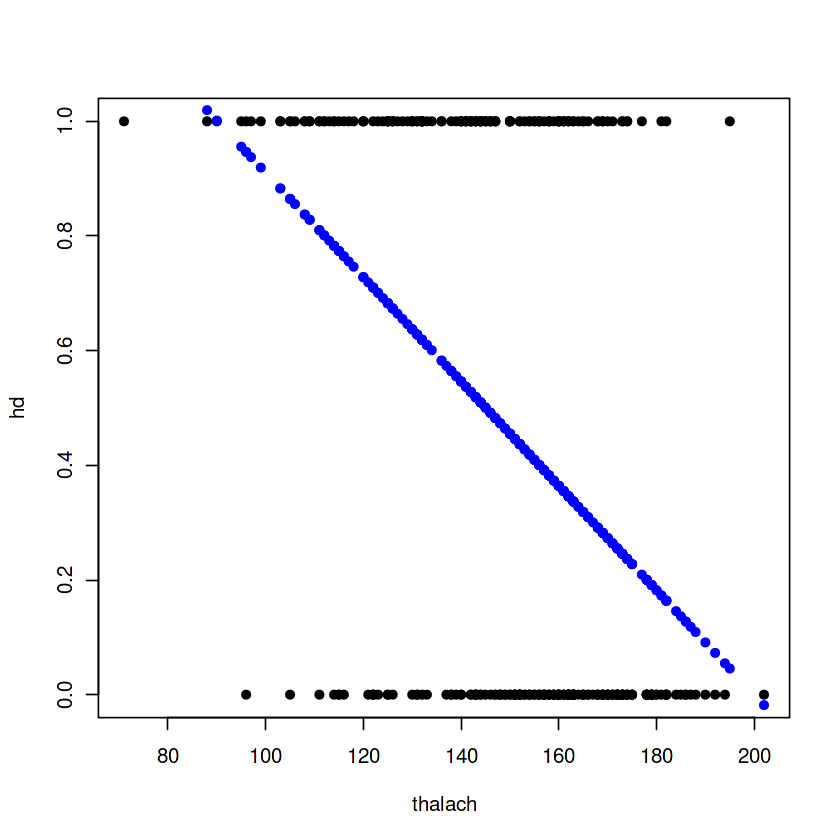

In [21]:
## Scatter plot displaying actual values and predicted values 

#Scatter Plot
plot (hd_data, pch=16)

#Predict Y using Linear Model
predY <- predict (model,hd_data)

#Overlay Predictions on Scatter Plot
points (hd_data$thalach, predY, col = "blue", pch=16)


In [22]:
#Calculate RMSE 
RMSE=rmse(predY,hd_data$hd)
print(RMSE)

[1] 0.4528656


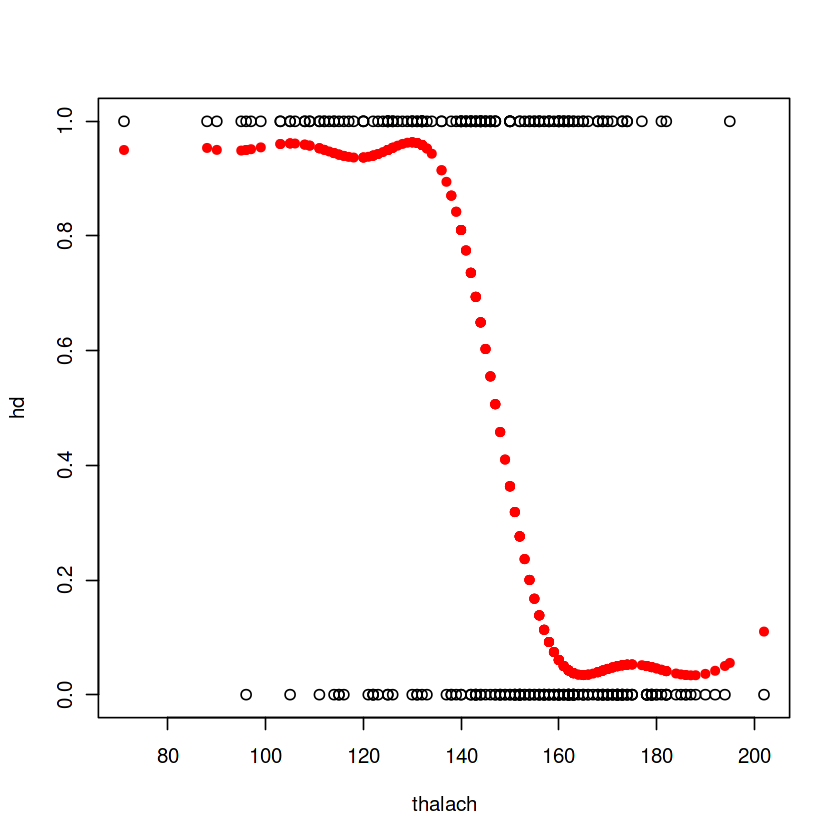

In [23]:
library(e1071)
plot(hd_data)

#Regression with SVM
modelsvm = svm(hd~thalach,hd_data)

#Predict using SVM regression
predYsvm = predict(modelsvm,hd_data)
#Overlay SVM Predictions on Scatter Plot
points(hd_data$thalach, predYsvm, col="red", pch=16)

In [24]:
##Calculate parameters of the SVR model

#Find value of W
W = t(modelsvm$coefs) %*% modelsvm$SV

#Find value of b
b = modelsvm$rho

In [25]:
## RMSE for SVR Model

#Calculate RMSE 
RMSEsvm=rmse(predYsvm,hd_data$hd)
print(RMSEsvm)

[1] 0.4926838


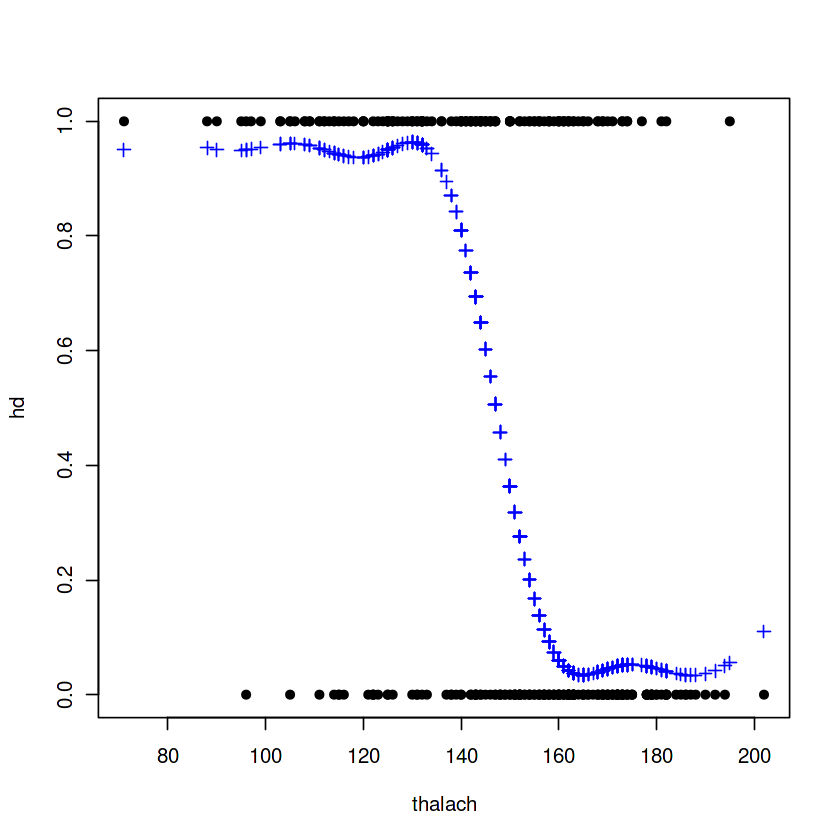

In [26]:
#plotting svr model and data points in same plot
plot(hd_data, pch=16)
points(hd_data$thalach, predYsvm, col = "blue", pch=3)


In [27]:
#This whole process was done for variable thalach
#Now, we will implement SVR model for variable age and sex
hd_age = subset(hd_age, select = -c(sex,thalach) )
print(hd_age)


    age hd
1    63  0
2    67  1
3    67  1
4    37  0
5    41  0
6    56  0
7    62  1
8    57  0
9    63  1
10   53  1
11   57  0
12   56  0
13   56  1
14   44  0
15   52  0
16   57  0
17   48  1
18   54  0
19   48  0
20   49  0
21   64  0
22   58  0
23   58  1
24   58  1
25   60  1
26   50  0
27   58  0
28   66  0
29   43  0
30   40  1
31   69  0
32   60  1
33   64  1
34   59  0
35   44  0
36   42  0
37   43  1
38   57  1
39   55  1
40   61  0
41   65  1
42   40  0
43   71  0
44   59  0
45   61  1
46   58  1
47   51  0
48   50  1
49   65  0
50   53  0
51   41  0
52   65  0
53   44  1
54   44  0
55   60  1
56   54  1
57   50  1
58   41  1
59   54  0
60   51  0
61   51  1
62   46  0
63   58  1
64   54  0
65   54  1
66   60  1
67   60  1
68   54  0
69   59  1
70   46  1
71   65  0
72   67  1
73   62  1
74   65  1
75   44  1
76   65  0
77   60  1
78   51  0
79   48  0
80   58  1
81   45  0
82   53  0
83   39  0
84   68  1
85   52  0
86   44  0
87   47  0
88   53  0
89   53  0
90   51  0

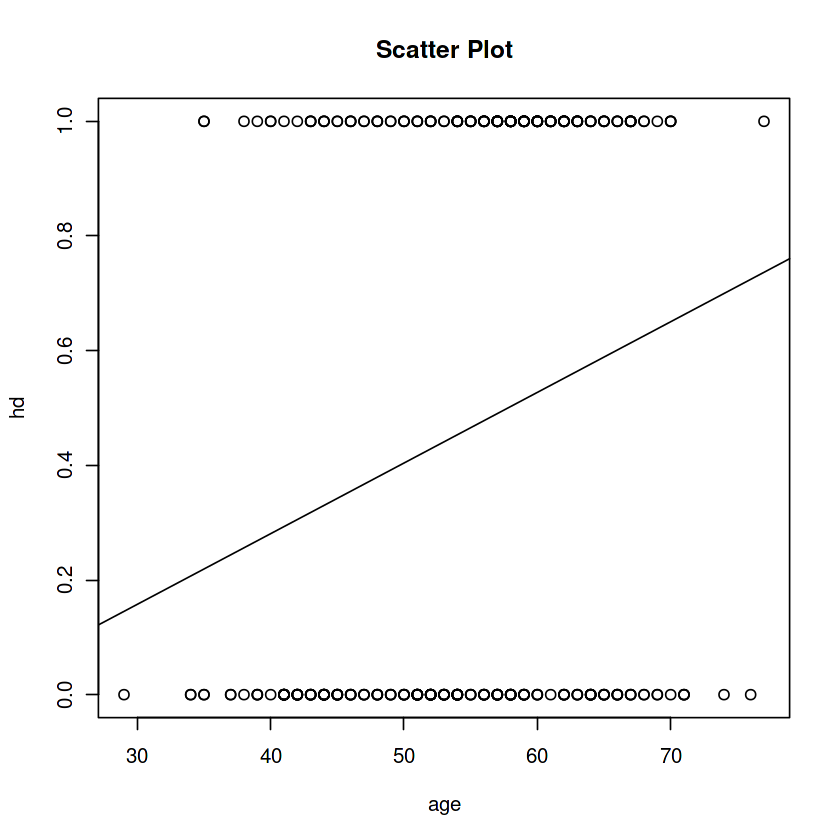

In [28]:
plot(hd_age, main ="Scatter Plot")

model=lm(hd~age,hd_age)
abline(model)

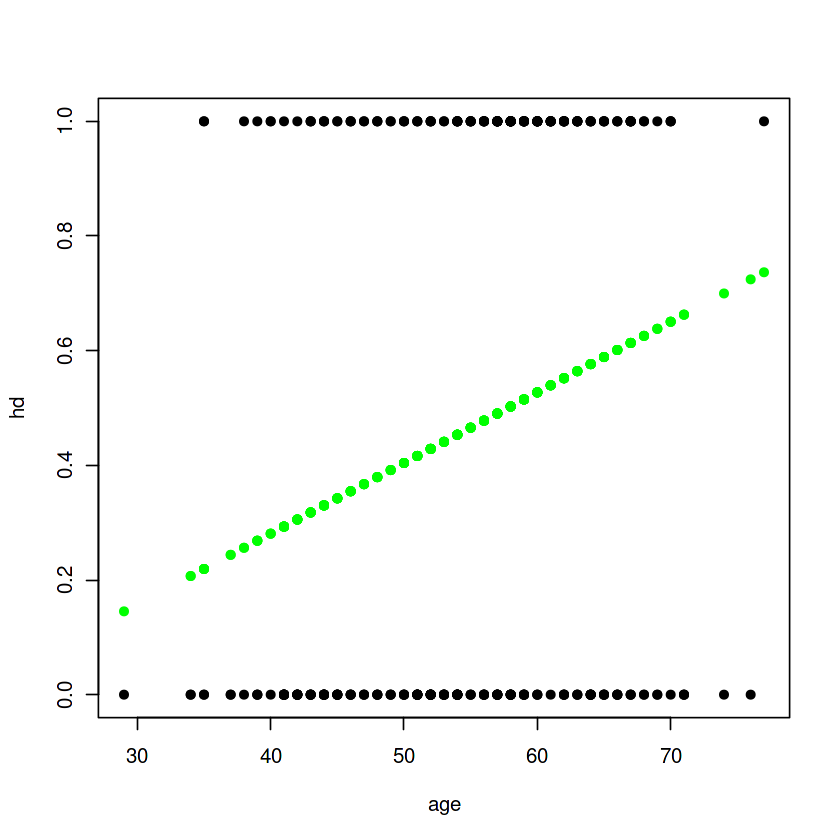

In [29]:
## Scatter plot displaying actual values and predicted values 

#Scatter Plot
plot (hd_age, pch=16)

#Predict Y using Linear Model
predY <- predict (model,hd_age)

#Overlay Predictions on Scatter Plot
points (hd_age$age, predY, col = "green", pch=16)

In [30]:
#Calculate RMSE for age
RMSE=rmse(predY,hd_age$hd)
print(RMSE)


[1] 0.4857336


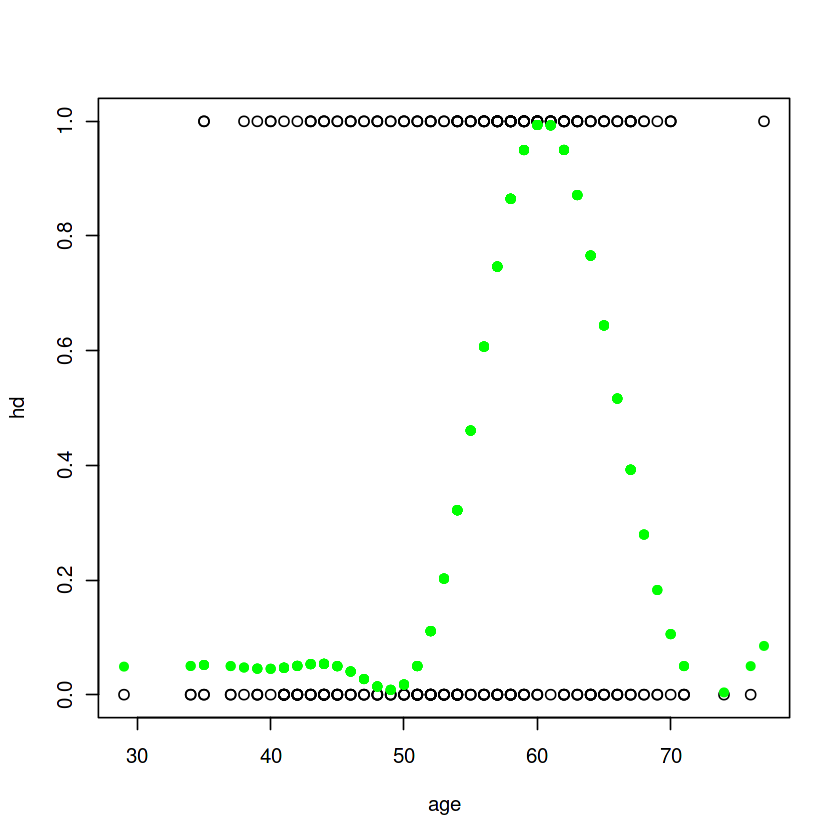

In [31]:
library(e1071)
plot(hd_age)

#Regression with SVM
modelsvm = svm(hd~age,hd_age)

#Predict using SVM regression
predYsvmage = predict(modelsvm,hd_age)
#Overlay SVM Predictions on Scatter Plot
points(hd_age$age, predYsvmage, col="green", pch=16)

In [32]:
##Calculate parameters of the SVR model

#Find value of W
W = t(modelsvm$coefs) %*% modelsvm$SV

#Find value of b
b = modelsvm$rho

In [33]:
## RMSE for SVR Model
#Calculate RMSE 
RMSEsvm=rmse(predYsvmage,hd_age$hd)
print(RMSEsvm)


[1] 0.5239968


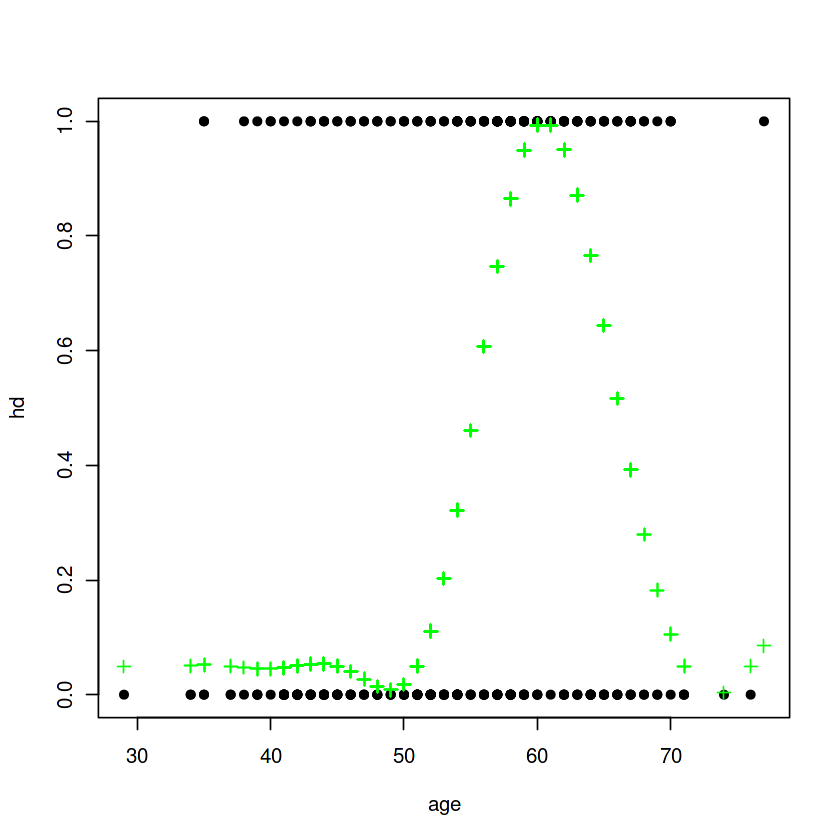

In [34]:
#plotting svr model and data points in same plot
plot(hd_age, pch=16)
points(hd_age$age, predYsvmage, col = "green", pch=3)


In [35]:
#This whole process was done for variable age
#Now, we will implement SVR model for variable  sex
hd_sex = subset(hd_sex, select = -c(age,thalach) )
print(hd_sex)

       sex hd
1     Male  0
2     Male  1
3     Male  1
4     Male  0
5   Female  0
6     Male  0
7   Female  1
8   Female  0
9     Male  1
10    Male  1
11    Male  0
12  Female  0
13    Male  1
14    Male  0
15    Male  0
16    Male  0
17    Male  1
18    Male  0
19  Female  0
20    Male  0
21    Male  0
22  Female  0
23    Male  1
24    Male  1
25    Male  1
26  Female  0
27  Female  0
28  Female  0
29    Male  0
30    Male  1
31  Female  0
32    Male  1
33    Male  1
34    Male  0
35    Male  0
36    Male  0
37    Male  1
38    Male  1
39    Male  1
40    Male  0
41  Female  1
42    Male  0
43  Female  0
44    Male  0
45  Female  1
46    Male  1
47    Male  0
48    Male  1
49  Female  0
50    Male  0
51  Female  0
52    Male  0
53    Male  1
54    Male  0
55    Male  1
56    Male  1
57    Male  1
58    Male  1
59    Male  0
60    Male  0
61  Female  1
62  Female  0
63    Male  1
64  Female  0
65    Male  1
66    Male  1
67    Male  1
68    Male  0
69    Male  1
70    Male  1
71  Fe

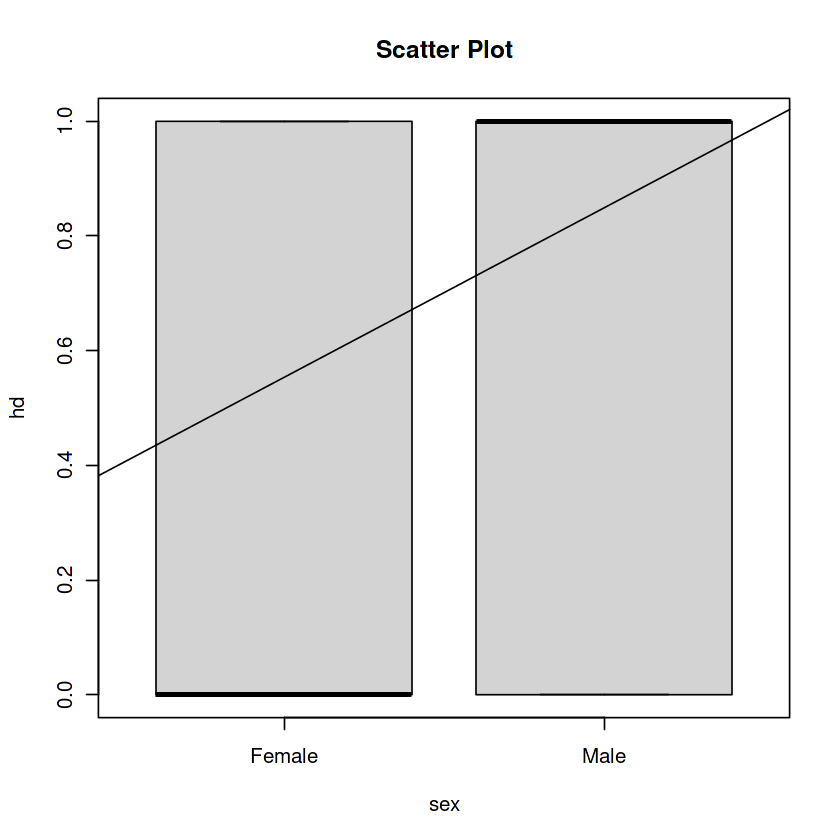

In [36]:
plot(hd_sex, main ="Scatter Plot")

model=lm(hd~sex,hd_sex)
abline(model)

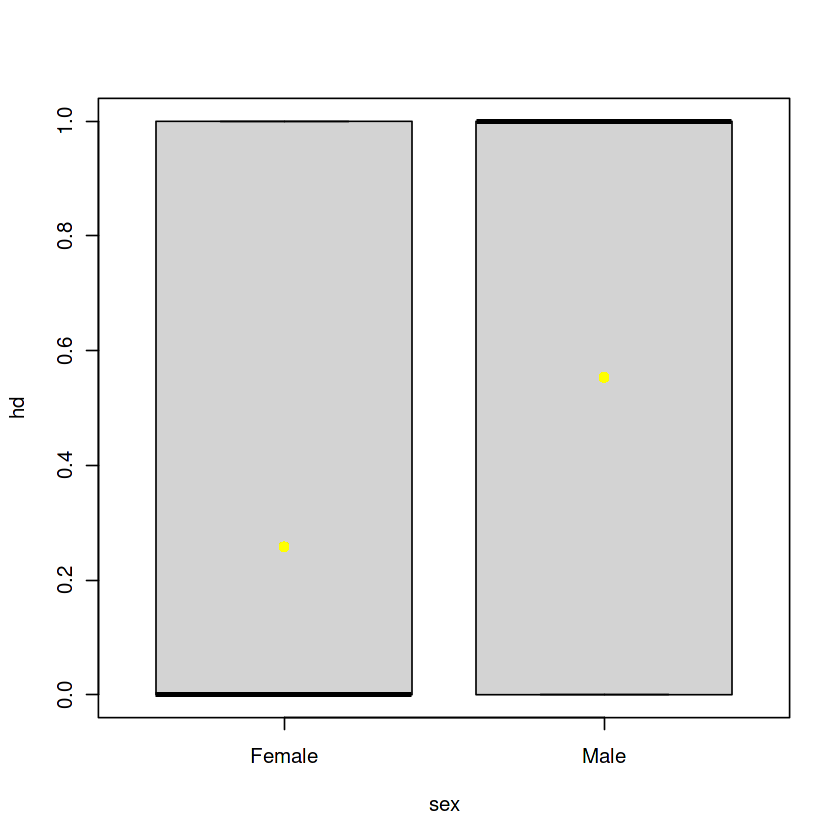

In [37]:
## Scatter plot displaying actual values and predicted values 

#Scatter Plot
plot (hd_sex, pch=16)

#Predict Y using Linear Model
predY <- predict (model,hd_sex)

#Overlay Predictions on Scatter Plot
points (hd_sex$sex, predY, col = "yellow", pch=16)


In [38]:
#Calculate RMSE 
RMSE=rmse(predY,hd_sex$hd)
print(RMSE)

[1] 0.4788232


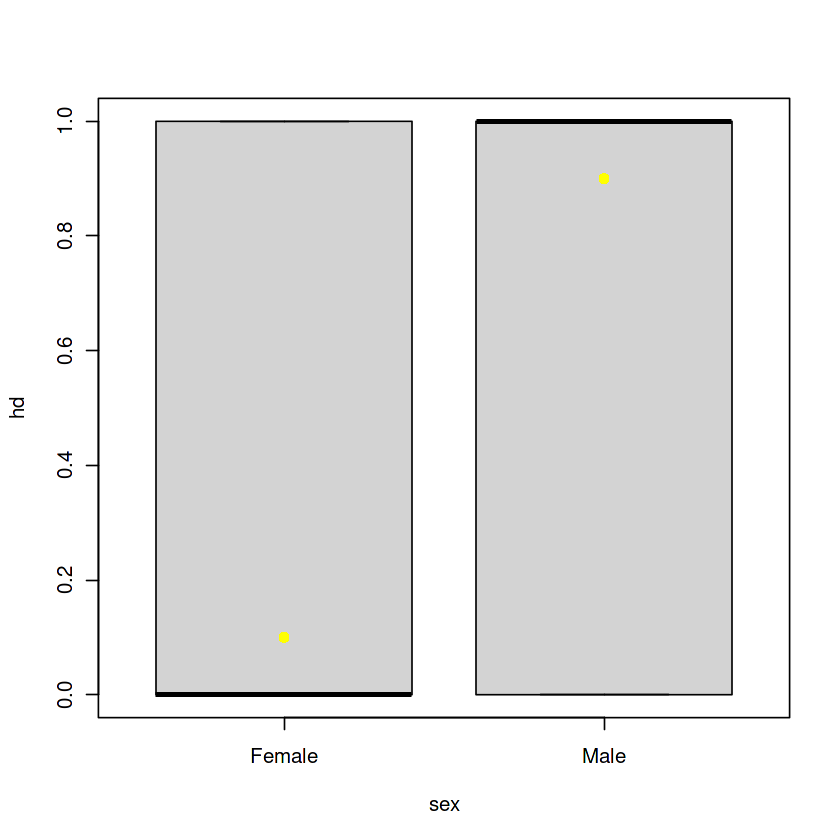

In [39]:
library(e1071)
plot(hd_sex)

#Regression with SVM
modelsvm = svm(hd~sex,hd_sex)

#Predict using SVM regression
predYsvmsex = predict(modelsvm,hd_sex)
#Overlay SVM Predictions on Scatter Plot
points(hd_sex$sex, predYsvmsex, col="yellow", pch=16)

In [40]:
##Calculate parameters of the SVR model

#Find value of W
W = t(modelsvm$coefs) %*% modelsvm$SV

#Find value of b
b = modelsvm$rho

In [41]:
## RMSE for SVR Model

#Calculate RMSE 
RMSEsvm=rmse(predYsvmsex,hd_sex$hd)
print(RMSEsvm)

[1] 0.564722


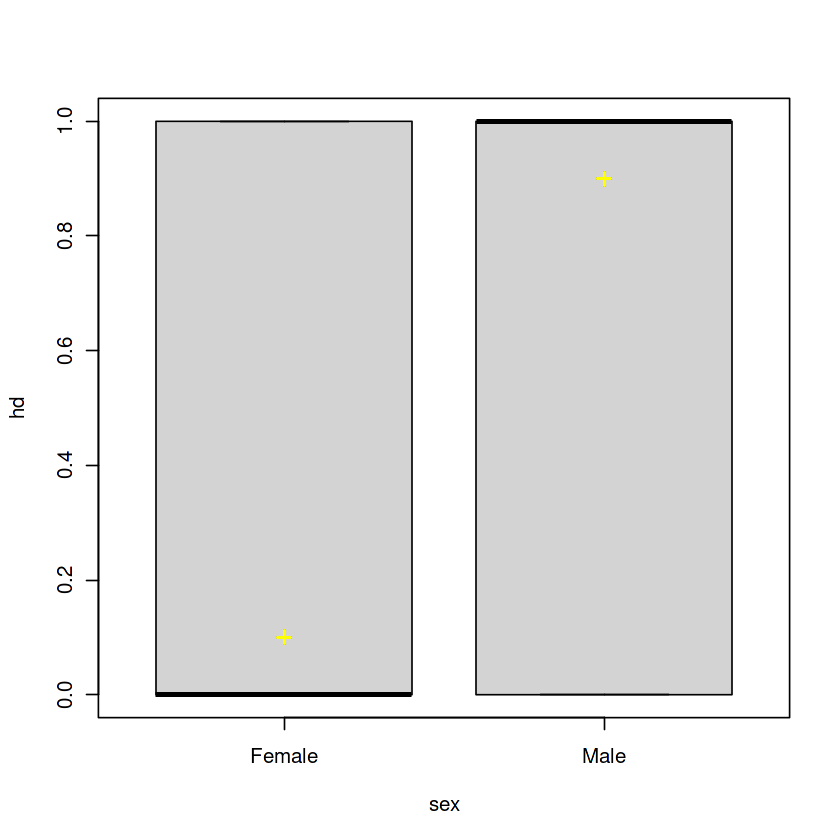

In [42]:
#plotting svr model and data points in same plot
plot(hd_sex, pch=16)
points(hd_sex$sex, predYsvmsex, col = "yellow", pch=3)


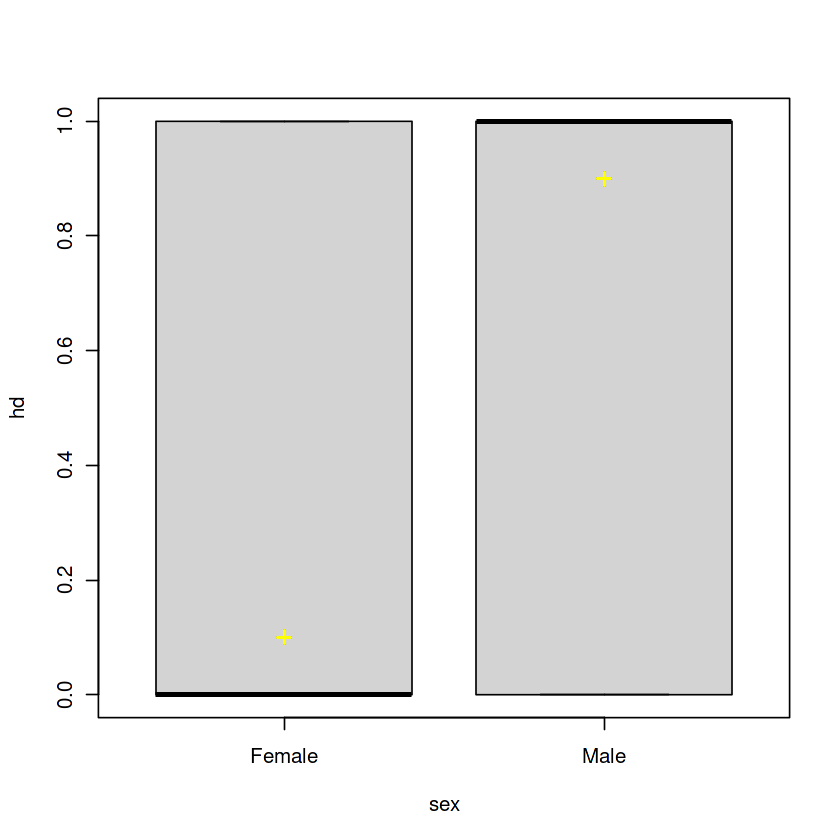

In [46]:
plot(hd_sex, pch=16)
points(hd_sex$sex, predYsvmsex, col = "yellow", pch=3)
points(hd_age$age, predYsvmage, col = "green", pch=3)
points(hd_data$thalach, predYsvm,col = "blue", pch=3)
